In [18]:
# Step 1: Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
# Step 2: Load and Prepare the Wine Dataset
df = load_wine()
X = df.data
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [19]:
# Step 3: Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 3) # Output layer for 3 classes
        )
    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
losses = []
# Step 4: Train the Model
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss:{running_loss/len(train_loader):.4f}")

Epoch 1/20, Loss:1.0864
Epoch 2/20, Loss:1.0686
Epoch 3/20, Loss:1.0446
Epoch 4/20, Loss:1.0085
Epoch 5/20, Loss:0.9453
Epoch 6/20, Loss:0.8547
Epoch 7/20, Loss:0.7413
Epoch 8/20, Loss:0.6186
Epoch 9/20, Loss:0.5055
Epoch 10/20, Loss:0.4353
Epoch 11/20, Loss:0.3841
Epoch 12/20, Loss:0.3492
Epoch 13/20, Loss:0.3242
Epoch 14/20, Loss:0.3021
Epoch 15/20, Loss:0.2744
Epoch 16/20, Loss:0.2462
Epoch 17/20, Loss:0.2129
Epoch 18/20, Loss:0.1667
Epoch 19/20, Loss:0.1206
Epoch 20/20, Loss:0.0782


Test Accuracy: 1.0000


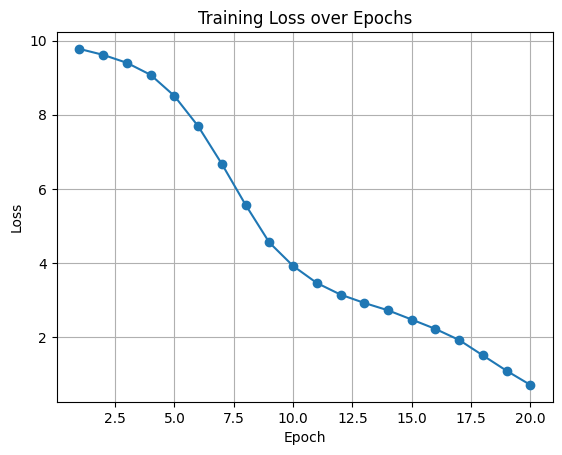

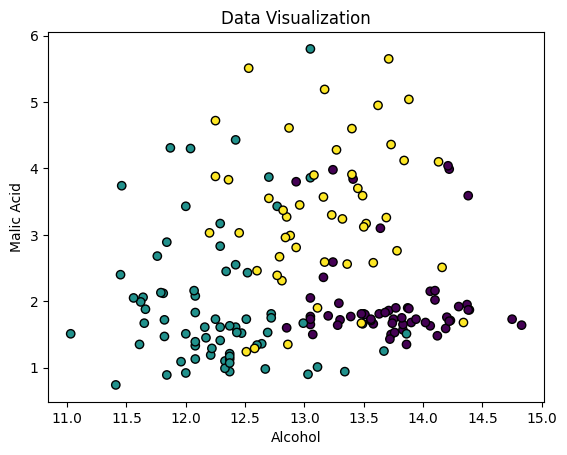

In [21]:
# Step 5: Validate the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for X_batch, y_batch in test_loader:
    outputs = model(X_batch)
    _, predicted = torch.max(outputs, 1)
    total += y_batch.size(0)
    correct += (predicted == y_batch).sum().item()
  accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

# Step 6: Visualize Training Loss and Data Distribution
# Plotting training loss (example values, replace with real loss values if collected)

plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()
# Visualize data distribution
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Data Visualization')
plt.show()